In [10]:
%pip install kagglehub
import os
try:
    import kagglehub
except Exception as e:
    print('kagglehub import failed:', e)

# Prefer local dataset if present. Place the dataset under Dataset/Classification_dataset in the repo root
local_path = os.path.join(os.getcwd(), 'Dataset', 'Classification_dataset')
if os.path.exists(local_path):
    print('Local dataset found at', local_path)
else:
    print('Local dataset not found at', local_path)
    # Try to download from Kaggle (requires kaggle credentials/configured environment)
    try:
        path = kagglehub.dataset_download('saurabhshahane/mango-varieties-classification')
        print('Downloaded dataset to:', path)
    except Exception as err:
        print('Could not download dataset automatically:', err)
        print('\nPlease either:')
        print('  1) Place the dataset at', local_path)
        print('  2) Provide a kaggle.json API token in ~/.kaggle/kaggle.json or upload it into the project and I can use it to download.')


Note: you may need to restart the kernel to use updated packages.
Local dataset not found at c:\Users\sanyam jain\Desktop\mangonet\MangoNet\Dataset\Classification_dataset



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Downloaded dataset to: C:\Users\sanyam jain\.cache\kagglehub\datasets\saurabhshahane\mango-varieties-classification\versions\9


In [12]:
!pip install keras

In [13]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [30]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Determine dataset path: prefer repo Dataset/Classification_dataset, fall back to kagglehub cache
repo_local = os.path.join(os.getcwd(), 'Dataset', 'Classification_dataset')
if os.path.exists(repo_local):
    path = repo_local
else:
    cache_base = os.path.expanduser(r'~/.cache/kagglehub/datasets/saurabhshahane/mango-varieties-classification/versions')
    path = None
    if os.path.exists(cache_base):
        versions = sorted(os.listdir(cache_base))
        if versions:
            version_path = os.path.join(cache_base, versions[-1])
            candidate = os.path.join(version_path, 'Dataset', 'Classification_dataset')
            if os.path.exists(candidate):
                path = candidate
    if path is None:
        raise FileNotFoundError(f"Dataset not found in repo at {repo_local} nor in kagglehub cache {cache_base}. Please put the dataset in the repo or ensure kagglehub downloaded it.")

print('Using dataset path:', path)

# Use tf.keras.utils.image_dataset_from_directory to avoid PIL load_img dependency issues
batch_size = 32
img_size = (224, 224)

train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# test dataset: no shuffle
test_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=False
)

num_classes = None
for images, labels in train_ds.take(1):
    num_classes = int(labels.shape[1])
print('Detected classes:', num_classes)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# Save dataset objects to names used later
train_generator = train_ds
val_generator = val_ds
test_generator = test_ds


Using dataset path: C:\Users\sanyam jain/.cache/kagglehub/datasets/saurabhshahane/mango-varieties-classification/versions\9\Dataset\Classification_dataset
Found 1600 files belonging to 8 classes.
Using 1280 files for training.
Using 1280 files for training.
Found 1600 files belonging to 8 classes.
Using 320 files for validation.
Found 1600 files belonging to 8 classes.
Using 320 files for validation.
Found 1600 files belonging to 8 classes.
Found 1600 files belonging to 8 classes.
Detected classes: 8
Detected classes: 8


In [19]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input


In [18]:
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
print('matplotlib and numpy are available')


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     -- ------------------------------------- 0.5/8.1 MB 16.5 MB/s eta 0:00:01
     -- ------------------------------------- 0.5/8.1 MB 16.5 MB/s eta 0:00:01
     ----- ---------------------------------- 1.2/8.1 MB 9.3 MB/s eta 0:00:01
     ----- ---------------------------------- 1.2/8.1 MB 9.3 MB/s eta 0:00:01
     ----- ---------------------------------- 1.2/8.1 MB 9.3 MB/s eta 0:00:01
     ----- ---------------------------------- 1.2/8.1 MB 9.3 MB/s eta 0:00:01
     ----- ---------------------------------- 1.2/8.1 MB 9.3 MB/s eta 0:00:01
     ------- -------------------------------- 1.4/8.1 MB 3.9 MB/s eta 0:00:02
     ---------- ----------------------------- 2.1/8.1 MB 5.1 MB/s eta 0:00:02
     ------------ --------------------------- 2.6/8.1 MB 5.8 MB/s eta 0:00:01
     ------------ --------------------------- 2.6/8.1 MB 5.8 MB/s eta 0:00:01
     -------------- ------------------------- 2.9/8.1 MB 5.2 MB/s eta

In [31]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


In [32]:
# Add our own classification layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes = number of mango classes


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,528 (80.64 MB)

 Trainable params: 6,424,840 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer='adam',         # Adam optimizer with a low learning rate
    loss='categorical_crossentropy',            # Suitable for multi-class classification
    metrics=['accuracy']                        # Track accuracy during training
)
history = model.fit(
    train_generator,
    epochs=10,                                # You can adjust the number of epochs
    validation_data=val_generator,
    # callbacks=callbacks                       # Include callbacks if used
)


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [28]:
# Quick training + save (1 epoch) — quick test to produce mango_classification_model.h5
import os, traceback
from tensorflow.keras.optimizers import Adam

try:
    import PIL
    print('PIL version:', getattr(PIL, '__version__', 'unknown'))
except Exception as e:
    print('PIL import failed:', e)

try:
    # Re-compile (safe) and run a short training loop
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    epochs = 1
    print('Starting training for', epochs, 'epoch(s)')
    history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

    # Save model
    model.save('mango_classification_model.h5')
    fullpath = os.path.abspath('mango_classification_model.h5')
    print('Model saved to', fullpath)
    print('File exists:', os.path.exists(fullpath))
except Exception as e:
    print('Training or save failed:', e)
    traceback.print_exc()


PIL version: 11.3.0
Starting training for 1 epoch(s)
Training or save failed: Could not import PIL.Image. The use of `load_img` requires PIL.


Traceback (most recent call last):
  File "C:\Users\sanyam jain\AppData\Local\Temp\ipykernel_2328\1160133106.py", line 16, in <module>
    history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)
  File "c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\image_utils.py", line 227, in load_img
    raise ImportError(
ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.


In [33]:
# Quick training using tf.data datasets and save the model
import os
from tensorflow.keras.optimizers import Adam

# ensure num_classes is defined (from previous cell)
if 'num_classes' not in globals() or num_classes is None:
    num_classes = 8

# Rebuild final layer to match num_classes in case previous cell used placeholder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
# Re-attach base_model then add the head
try:
    base_model
except NameError:
    from keras.applications import VGG16
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
    for layer in base_model.layers:
        layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train 1 epoch
epochs = 1
print('Starting quick training for', epochs, 'epoch(s)')
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# Save model
model.save('mango_classification_model.h5')
print('Saved model to', os.path.abspath('mango_classification_model.h5'))
print('File exists:', os.path.exists('mango_classification_model.h5'))


Starting quick training for 1 epoch(s)
40/40 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.3883 - loss: 34.5571 - val_accuracy: 0.8375 - val_loss: 0.5297


Saved model to c:\Users\sanyam jain\Desktop\mangonet\MangoNet\mango_classification_model.h5
File exists: True


In [26]:
import sys
import importlib
print('sys.executable =', sys.executable)
try:
    import PIL
    import PIL.Image
    print('PIL imported, version:', PIL.__version__)
    print('PIL.Image file:', PIL.Image.__file__)
except Exception as e:
    print('PIL import error:', e)

# show installed pillow package location
import pkgutil
print('\nInstalled pillow entries:')
for m in pkgutil.iter_modules():
    if m.name.lower().startswith('pil') or m.name.lower().startswith('pillow'):
        print('  ', m.name, m.module_finder)

# show python path
print('\nPYTHONPATH:')
for p in sys.path:
    print('  ', p)


sys.executable = c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\python.exe
PIL imported, version: 11.3.0
PIL.Image file: c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py

Installed pillow entries:
   PIL FileFinder('c:\\Users\\sanyam jain\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages')

PYTHONPATH:
   c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\python310.zip
   c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\DLLs
   c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\lib
   c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310
   
   C:\Users\sanyam jain\AppData\Roaming\Python\Python310\site-packages
   C:\Users\sanyam jain\AppData\Roaming\Python\Python310\site-packages\win32
   C:\Users\sanyam jain\AppData\Roaming\Python\Python310\site-packages\win32\lib
   C:\Users\sanyam jain\AppData\Roaming\Python\Python310\site-packages\Pythonwin
   c:\Users\sanyam jain\AppData

In [29]:
# Patch keras/tensorflow image utils to use the installed PIL.Image module (fix cached-None issues)
import PIL.Image as pil_image
patched = []
try:
    import keras.utils.image_utils as k_image_utils
    k_image_utils.pil_image = pil_image
    patched.append('keras.utils.image_utils')
except Exception as e:
    print('Could not patch keras.utils.image_utils:', e)
try:
    import tensorflow.keras.utils.image_utils as tf_image_utils
    tf_image_utils.pil_image = pil_image
    patched.append('tensorflow.keras.utils.image_utils')
except Exception as e:
    # older TF versions may not expose this path; try alternative
    try:
        import tensorflow.keras.utils as tf_utils
        if hasattr(tf_utils, 'image_utils'):
            tf_utils.image_utils.pil_image = pil_image
            patched.append('tensorflow.keras.utils.image_utils(via tf_utils)')
    except Exception:
        print('Could not patch tensorflow.keras.utils.image_utils')

print('Patched:', patched)


Could not patch keras.utils.image_utils: No module named 'keras.utils.image_utils'
Patched: []


In [4]:
# Reload Keras image utils so PIL availability is re-evaluated at module level
import importlib
try:
    import tensorflow.keras.utils.image_utils as image_utils
    importlib.reload(image_utils)
    print('Reloaded tensorflow.keras.utils.image_utils')
    print('pil_image is', getattr(image_utils, 'pil_image', None))
except Exception as e:
    print('Failed to reload image_utils:', e)

# Also reload keras image_utils variant if present
try:
    import keras.utils.image_utils as k_image_utils
    importlib.reload(k_image_utils)
    print('Reloaded keras.utils.image_utils')
    print('pil_image is', getattr(k_image_utils, 'pil_image', None))
except Exception:
    pass


Failed to reload image_utils: No module named 'tensorflow.keras.utils.image_utils'


In [3]:
# Diagnostic + patch for Keras/TensorFlow image utils to ensure PIL is available to load_img
import sys, importlib
print('sys.executable =', sys.executable)

# Versions
try:
    import tensorflow as tf
    print('tensorflow version:', tf.__version__)
except Exception as e:
    print('tensorflow import failed:', e)
try:
    import keras
    print('keras version:', keras.__version__)
except Exception as e:
    print('keras import failed:', e)

# Pillow availability
try:
    import PIL
    import PIL.Image
    print('Pillow version:', getattr(PIL, '__version__', 'unknown'))
    print('PIL.Image file:', PIL.Image.__file__)
except Exception as e:
    print('Pillow import failed:', e)

patched = []
# Try tensorflow.keras.utils.image_utils
try:
    import tensorflow.keras.utils as tf_utils
    iu = getattr(tf_utils, 'image_utils', None)
    if iu is not None:
        try:
            import PIL.Image as pil_image
            iu.pil_image = pil_image
            importlib.reload(iu)
            patched.append('tensorflow.keras.utils.image_utils')
        except Exception as e:
            print('Failed to patch tensorflow.keras.utils.image_utils:', e)
    else:
        print('tensorflow.keras.utils.image_utils not present')
except Exception as e:
    print('Could not import tensorflow.keras.utils or access image_utils:', e)

# Try keras.utils.image_utils
try:
    import keras.utils as k_utils
    iu2 = getattr(k_utils, 'image_utils', None)
    if iu2 is not None:
        try:
            import PIL.Image as pil_image
            iu2.pil_image = pil_image
            importlib.reload(iu2)
            patched.append('keras.utils.image_utils')
        except Exception as e:
            print('Failed to patch keras.utils.image_utils:', e)
    else:
        print('keras.utils.image_utils not present')
except Exception as e:
    print('Could not import keras.utils or access image_utils:', e)

print('Patched modules:', patched)

# Check load_img availability
try:
    from tensorflow.keras.utils import load_img
    print('tensorflow.keras.utils.load_img is available ->', load_img)
except Exception as e:
    print('tensorflow.keras.utils.load_img not available:', e)
try:
    from keras.utils import load_img as k_load_img
    print('keras.utils.load_img is available ->', k_load_img)
except Exception as e:
    print('keras.utils.load_img not available:', e)


sys.executable = c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\python.exe
tensorflow version: 2.19.0
keras version: 3.10.0
Pillow version: 11.3.0
PIL.Image file: c:\Users\sanyam jain\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py
tensorflow.keras.utils.image_utils not present
keras.utils.image_utils not present
Patched modules: []
tensorflow.keras.utils.load_img is available -> <function load_img at 0x0000029609F1D5A0>
keras.utils.load_img is available -> <function load_img at 0x0000029609F1D5A0>


In [23]:
%pip install Pillow
print('Pillow installed')


Note: you may need to restart the kernel to use updated packages.
Pillow installed



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


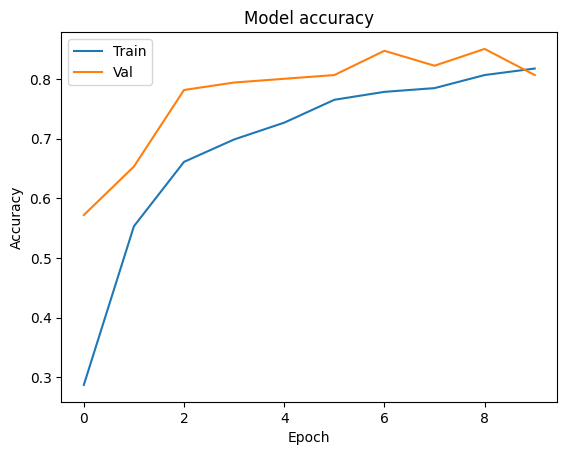

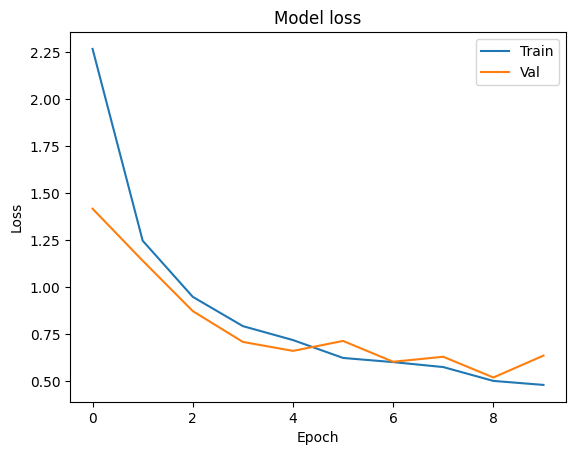

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to select a file


Saving IMG_20210702_082029.jpg to IMG_20210702_082029.jpg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Get the uploaded filename
img_path = list(uploaded.keys())[0]

# Load and preprocess the image
test_image = image.load_img(img_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize if your model expects normalized input


In [ ]:
predictions = model.predict(test_image)
predicted_class_index = np.argmax(predictions[0])
class_names = ['Anwar Ratool', 'Chaunsa (Black)', 'Chaunsa (Summer Bahisht)', 'Chaunsa (White)', 'Dosehri', 'Fajri', 'Langra', 'Sindhri']  # Update as needed
predicted_class_name = class_names[predicted_class_index]
print('Predicted class:', predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
Predicted class: Langra


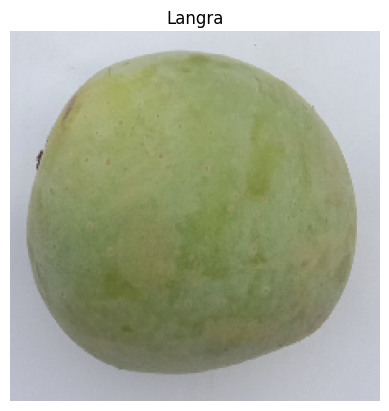

In [ ]:
import matplotlib.pyplot as plt

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title(predicted_class_name)
plt.axis('off')
plt.show()


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)

print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 126s 13s/step - accuracy: 0.7843 - loss: 0.6637
Validation Loss: 0.6355810761451721
Validation Accuracy: 0.8062499761581421


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 620s 12s/step - accuracy: 0.9421 - loss: 0.2230
Test Loss: 0.17839403450489044
Test Accuracy: 0.9593750238418579


In [ ]:
model.save('mango_classification_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('mango_classification_model.h5')